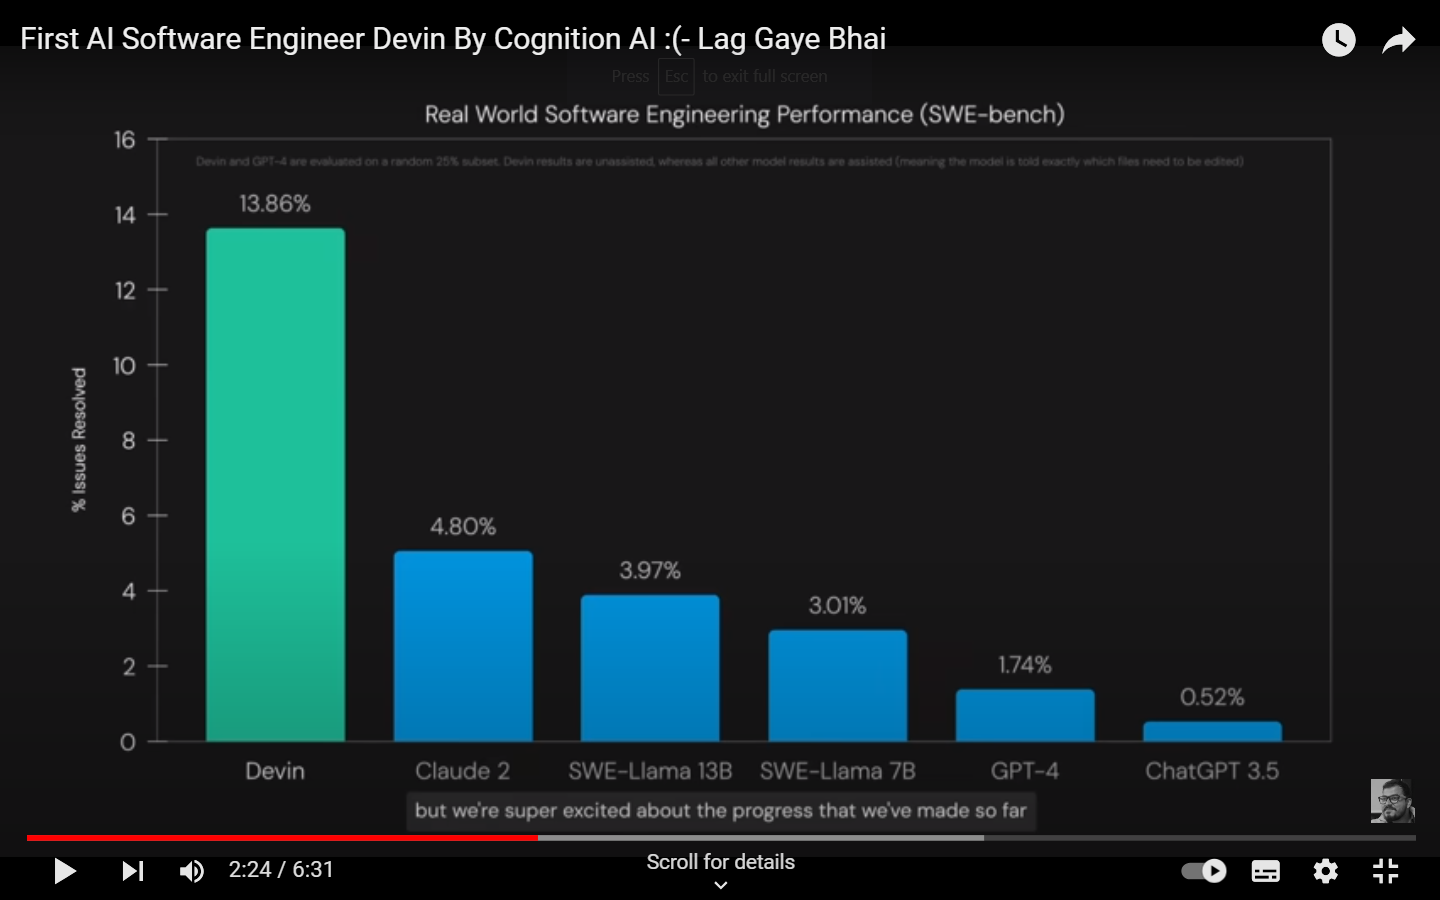

# Scope of Work

In [7]:
 #Backlog-your wishlist
 #MVP phase1 of project

# solution design and architecture

#### Dialogflow

In [8]:
#https://cloud.google.com/dialogflow/?utm_source=google&utm_medium=cpc&utm_campaign=japac-IN-all-en-dr-BKWS-all-mv-trial-EXA-dr-1605216&utm_content=text-ad-none-none-DEV_c-CRE_634266371002-ADGP_Hybrid+%7C+BKWS+-+EXA+%7C+Txt+~+AI+%26+ML_Dialogflow_dialogflow_main-KWID_43700074200986088-kwd-401718033071&userloc_9302211-network_g&utm_term=KW_dialogflow&gad_source=1&gclid=Cj0KCQjwncWvBhD_ARIsAEb2HW-kwmYP95lo-JL-zgA_zDrHxH9F1OZawlcpkuXL-Ktqhh3G06DXNQIaAhDHEALw_wcB&gclsrc=aw.ds

In [9]:
#https://dialogflow.cloud.google.com/#/getStarted

# Named Entity Recognition

In [10]:
#spacy

### Use case #1 search

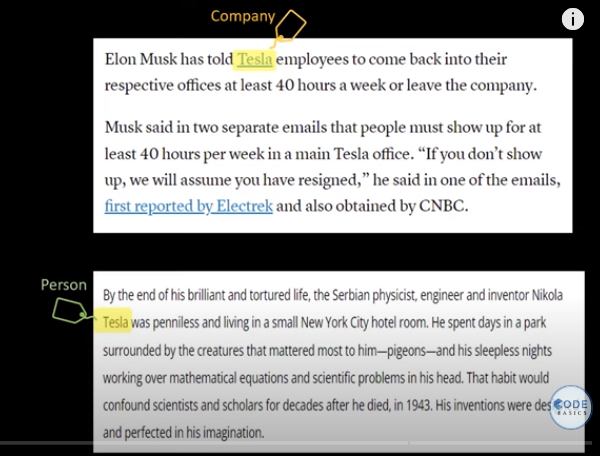

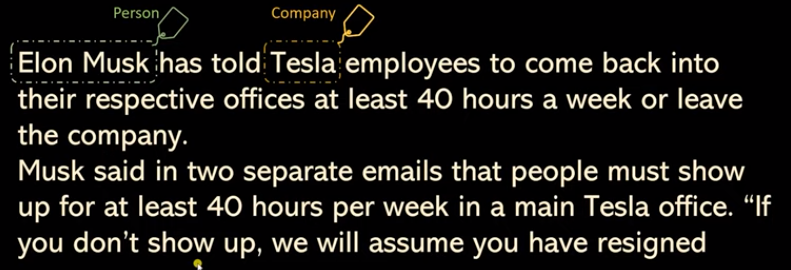

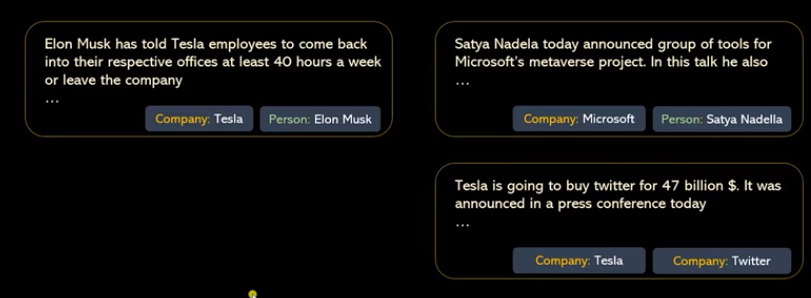

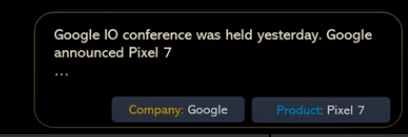

### Use case #2 recommendation

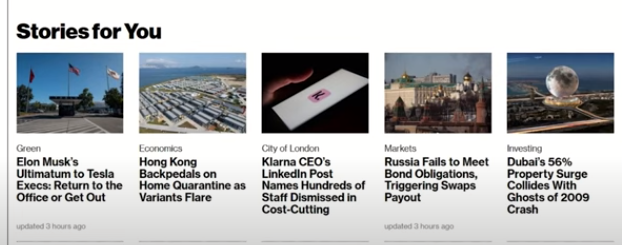

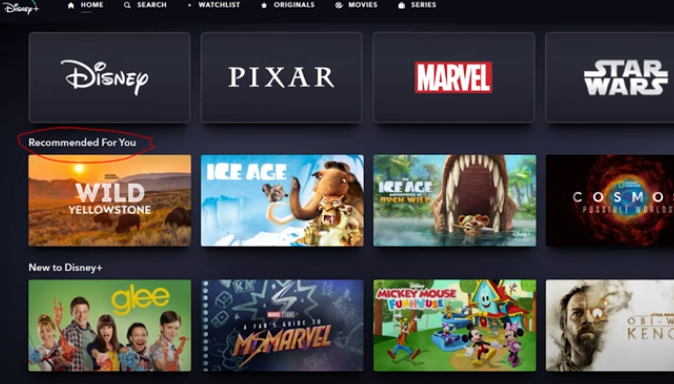

### Use case #3 customer care service

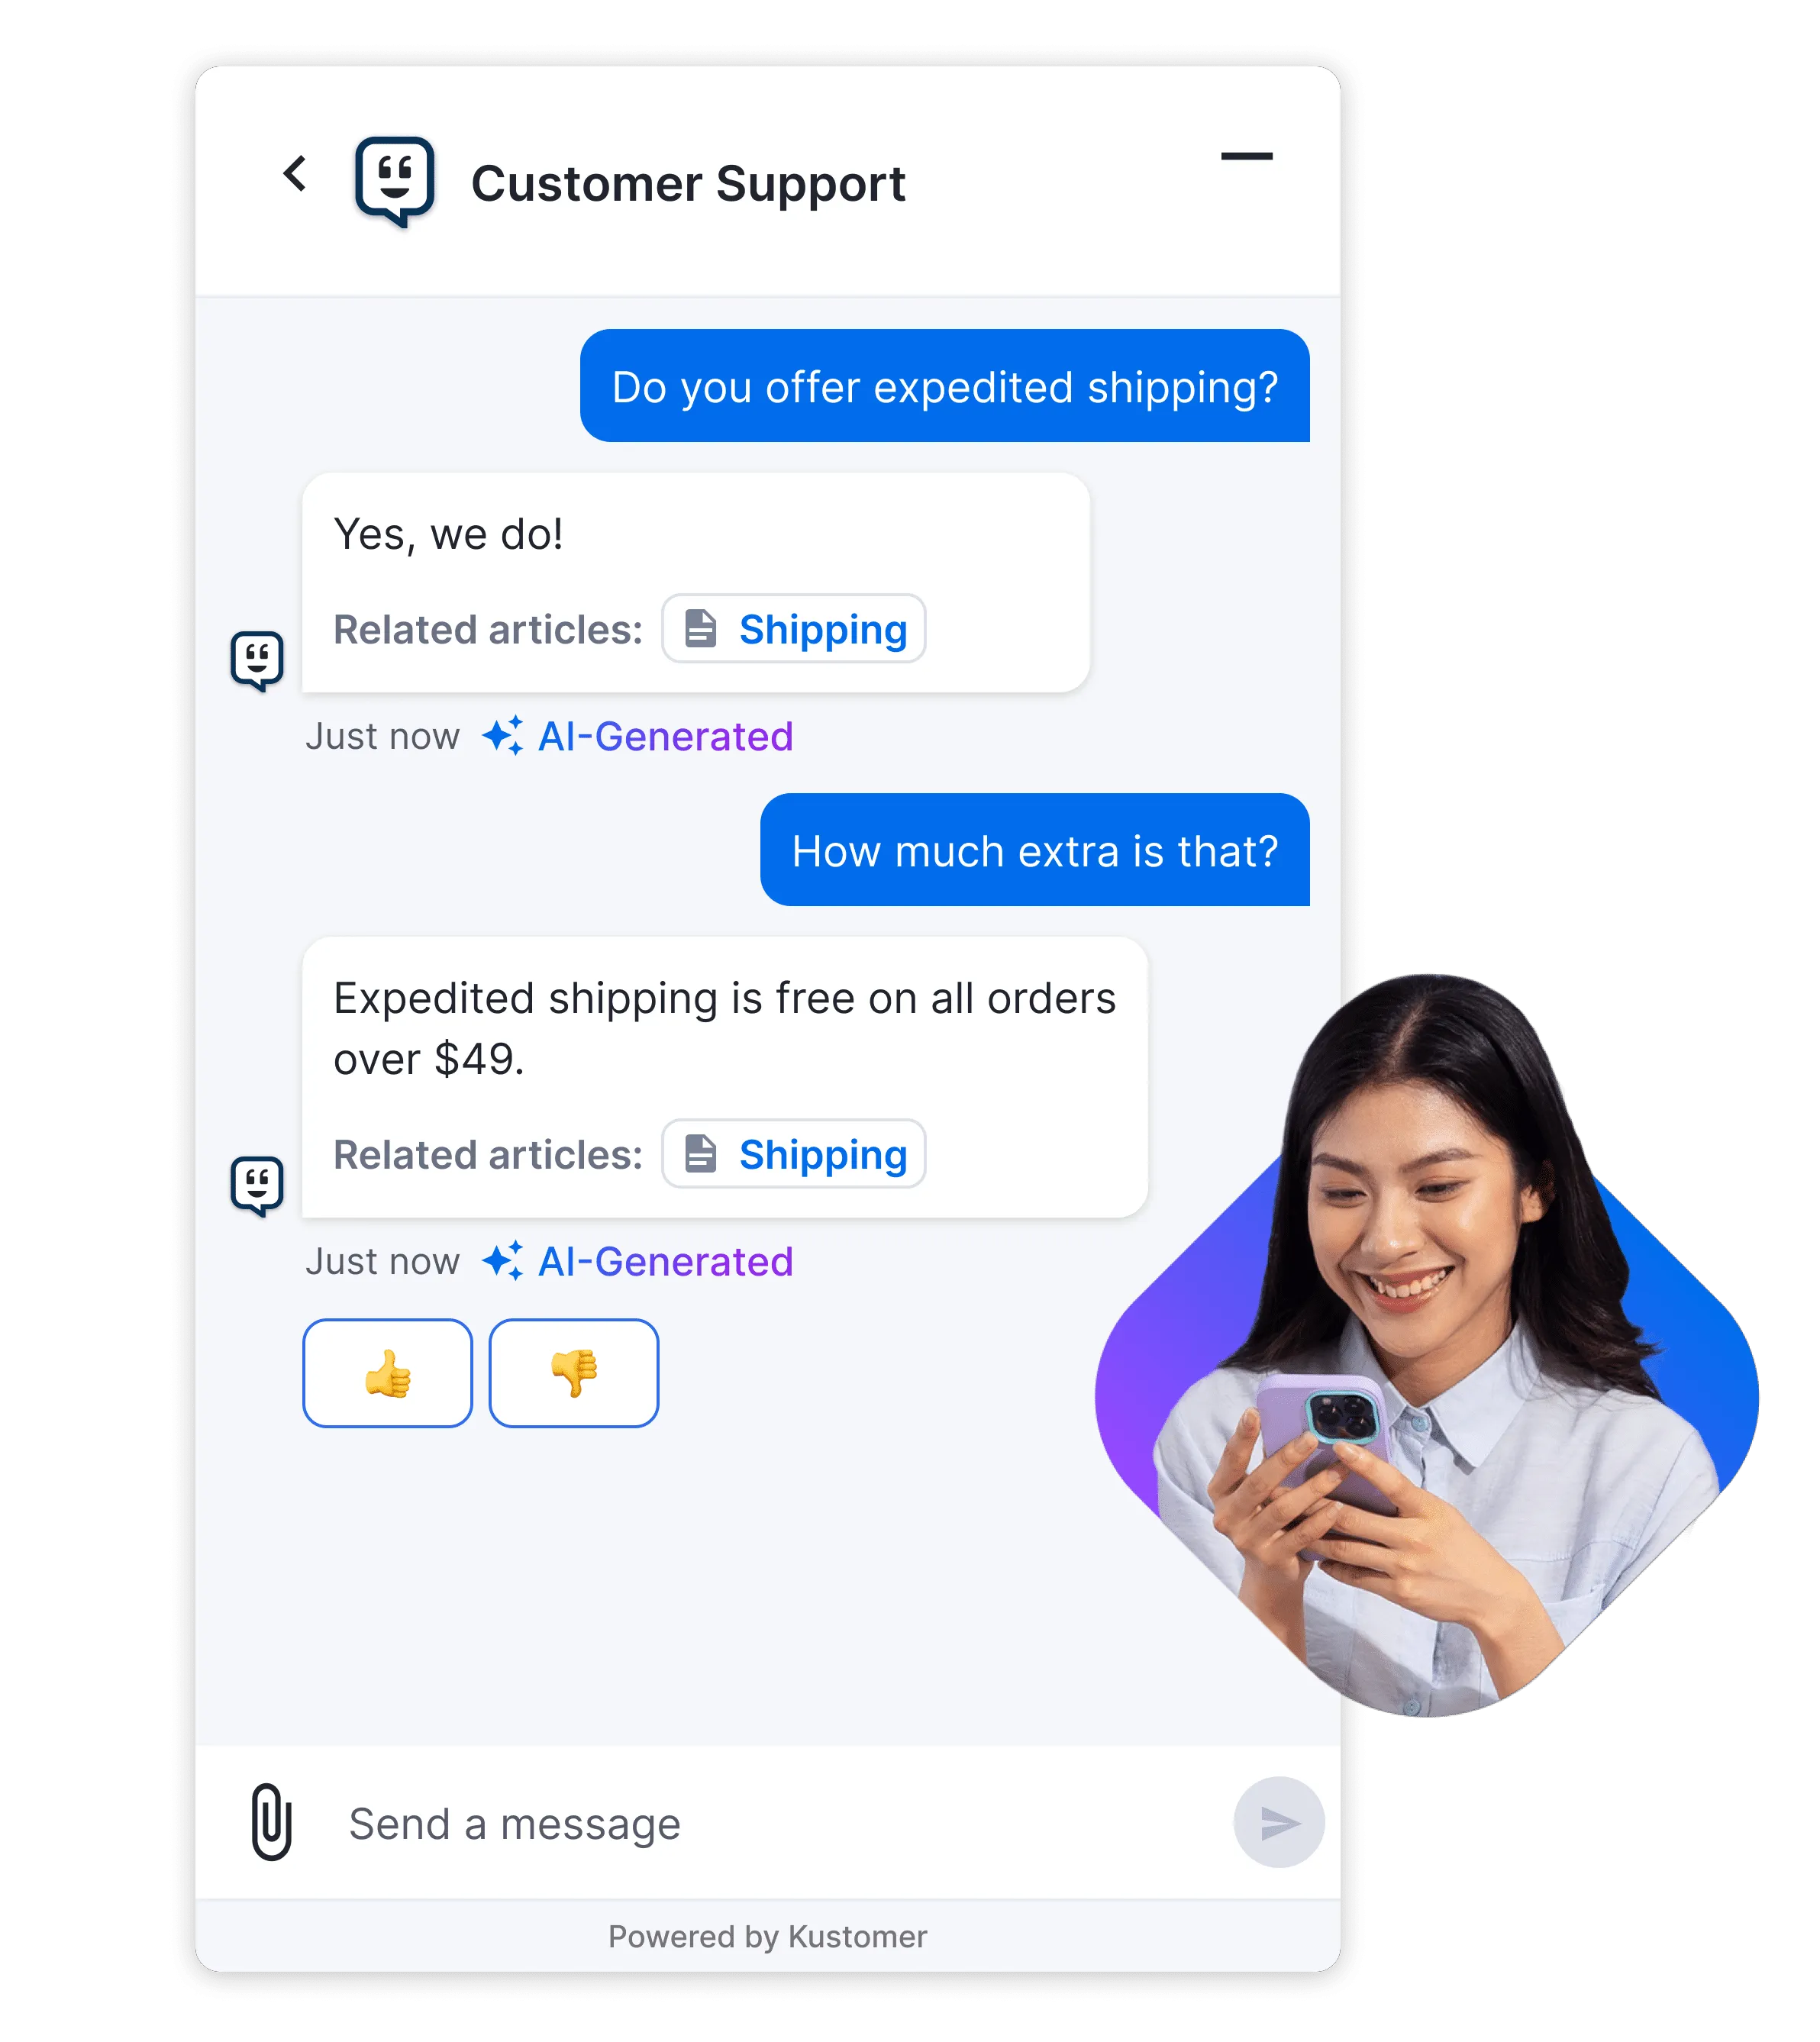

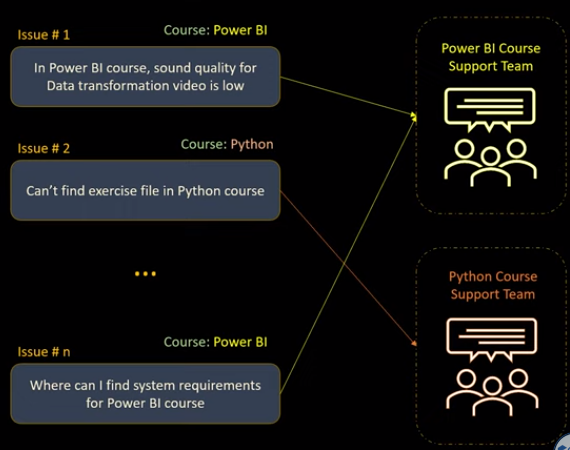

### NER supprt in spacy

In [11]:
pip install spacy

In [12]:
import spacy

In [13]:
#run this command on annaconda command prompt
#python -m spacy download en_core_web_sm

In [14]:
nlp=spacy.load("en_core_web_sm")

In [15]:
nlp.pipe_names
#components of spacy

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

### spacy supports labels

In [16]:
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [17]:
doc1=nlp("A data scientist is a professional who creates programming code and combines it with statistical knowledge to create insights from data.")

In [18]:
for entity in doc1.ents:
    print(entity.text,"|",entity.label_) #text=word,label_= label name

the doc1 doesn't contain any named entities, so you won't see any entities detected.

In [19]:
doc2=nlp("Tesla inc is going to acuire twitter for $45 billion")

In [20]:
for entity in doc2.ents:
    print(entity.text,"|",entity.label_)

Tesla inc | ORG
$45 billion | MONEY


In [21]:
doc3=nlp("Apple is planning to open a new store in London next month.India")
for entity in doc3.ents:
    print(entity.text,"|",entity.label_,spacy.explain(entity.label_))

Apple | ORG Companies, agencies, institutions, etc.
London | GPE Countries, cities, states
next month | DATE Absolute or relative dates or periods
India | GPE Countries, cities, states


In [22]:
# GPE:geopolitical

In [23]:
from spacy import displacy
displacy.render(doc1,style="ent")

C:\Users\prach\anaconda3\Lib\site-packages\spacy\displacy\__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [24]:

displacy.render(doc2,style="ent")

##### It didnt recognize that twitter is org.why? coz we have written in small letters

In [25]:
doc2=nlp("Tesla inc is going to acuire Twitter Inc for $45 billion")
displacy.render(doc2,style="ent")

In [26]:

displacy.render(doc3,style="ent")

In [27]:
doc4=nlp("""Mukesh Dhirubhai Ambani (born 19 April 1957) is an Indian businessman. He is the chairman and managing director of Reliance Industries, India's most valuable company by market value[4] with an estimated net worth of $117.8 billion according to Forbes as of March 2024, he is the richest person in Asia and 9th richest in the world.[5][6] Sometimes characterized as a plutocrat,[7] he has attracted both fame and notoriety for reports of market manipulation, political corruption, cronyism, and exploitation.""")

In [28]:
for entity in doc4.ents:
    print(entity.text,"|",entity.label_,spacy.explain(entity.label_))

Mukesh Dhirubhai Ambani | PERSON People, including fictional
19 April 1957 | DATE Absolute or relative dates or periods
Indian | NORP Nationalities or religious or political groups
Reliance Industries | ORG Companies, agencies, institutions, etc.
India | GPE Countries, cities, states
$117.8 billion | MONEY Monetary values, including unit
Forbes | ORG Companies, agencies, institutions, etc.
March 2024 | DATE Absolute or relative dates or periods
Asia | LOC Non-GPE locations, mountain ranges, bodies of water
9th | ORDINAL "first", "second", etc.
plutocrat,[7 | NORP Nationalities or religious or political groups


# Add custom entity to spacy

In [29]:
#so for that we can use span class of spacy
doc5=nlp("tesla is going to acuire twitter Inc for $45 billion. chetana,gauri")
displacy.render(doc5,style="ent")

In [30]:
#we can see here twitter is company name bt our spacy is not recognizing it as ORG 
#so we have add it manually ,we have to train our spacy again

In [31]:
doc5[0] #single token


tesla

In [32]:
type(doc5[0])

spacy.tokens.token.Token

In [33]:
doc5[0:3]

tesla is going

In [34]:
type(doc5[0:3])

spacy.tokens.span.Span

In [35]:
doc5[5:6]

twitter

In [36]:
type(doc5[5:6])

spacy.tokens.span.Span

In [37]:
dir(spacy.tokens)

['Doc',
 'DocBin',
 'MorphAnalysis',
 'Span',
 'SpanGroup',
 'Token',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_dict_proxies',
 '_retokenize',
 '_serialize',
 'doc',
 'morphanalysis',
 'span',
 'span_group',
 'token',
 'underscore']

In [38]:
from spacy.tokens import Span

In [39]:
#setting  twitter as 'ORG'
span2=Span(doc5,5,6,label="ORG")
span2

twitter

In [40]:
doc5.set_ents([span2],default="unmodified") #https://spacy.io/api/doc

In [41]:
displacy.render(doc5,style="ent")

In [42]:
doc5[12:13]

chetana

In [43]:
span3=Span(doc5,12,13,label="PERSON")
span3

chetana

In [44]:
span4=Span(doc5,14,15,label="PERSON")
span4

gauri

In [45]:
doc5.set_ents([span3,span4],default="unmodified") 

In [46]:
displacy.render(doc5,style="ent")